# Titanic

## Conteúdo 

**idade**: a idade é fracionária se for menor que 1. Se a idade for estimada, é na forma de xx.5 

Variable|Definition|Key
--|--|--
survival|Survival|0 = No, 1 = Yes
pclass|Status socioeconômico (SES) 1st = Upper 2nd = Middle 3rd = Lower|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sexo|
Age|Idade em anos|
sibsp|# Relações familiares | Sibling = irmão, irmã, meio-irmão, meia-irmã. Spouse = marido, esposa (amantes e noivos foram ignorados)
parch|# Relações familiares| Parent  = mãe, pai. Child = filha, filho, enteada, enteado Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas
ticket|Número do Ticket|
fare|Tarifa de passageiro|
cabin|Número da Cabine|
embarked|Local do Embarque|C = Cherbourg, Q = Queenstown, S = Southampton

## Carregando bibliotecas

In [2]:
library(RColorBrewer)
options(repr.plot.width= 4, repr.plot.height= 4)

## Abrindo o Arquivo

In [3]:
df = read.csv('../datasets/titanic/train.csv', na.strings = '')

head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Sumário Estatístico

In [4]:
summary(df)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

## Estudo das Variáveis

### Pclass

- Nenhuma valor inválido encontrado

In [5]:
table(df$Pclass, useNA='always')


   1    2    3 <NA> 
 216  184  491    0 

Pclass,Survived
1,0.6296296
2,0.4728261
3,0.2423625


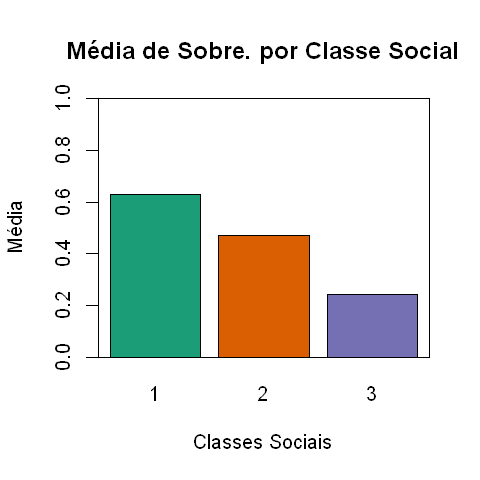

In [13]:
agg = aggregate(Survived ~ Pclass, data = df, mean)
agg

barplot(agg$Survived,
        main = "Média de Sobre. por Classe Social",
        xlab = "Classes Sociais",
        ylab = "Média",
        ylim = c(0,1),
        names.arg = agg$Pclass,
       col = brewer.pal(8, 'Dark2'))
box()

### Age

- 177 idade inválidas

In [30]:
sum(is.na(df['Age']))

[1] 177

[1] 1 2

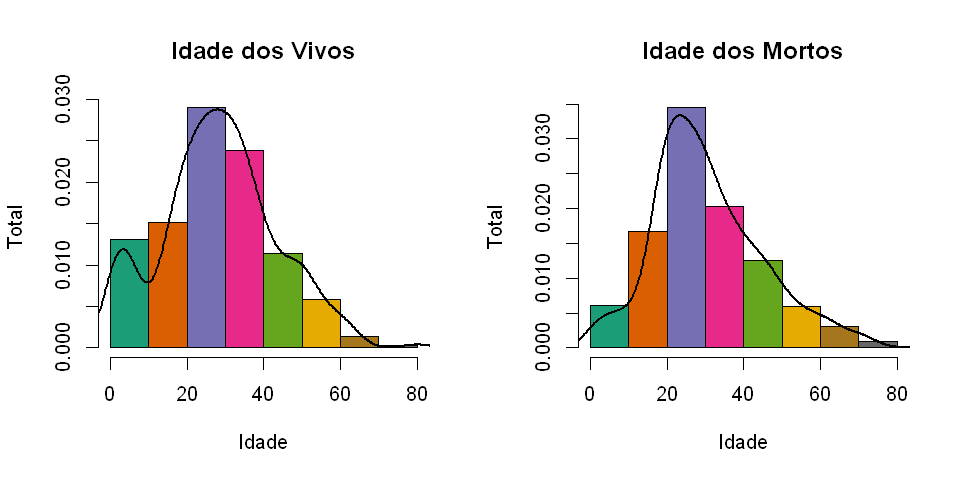

In [73]:
temp = df[!is.na(df$Age), ]
vivos = temp[temp$Survived == 1, ]
mortos = temp[temp$Survived == 0, ]

options(repr.plot.width= 8, repr.plot.height= 4)
split.screen(figs = c(1,2))
screen(1)
hist(vivos$Age,
        prob = TRUE,
        main = "Idade dos Vivos",
        xlab = "Idade",
        ylab =  "Total",
        col = brewer.pal(8, 'Dark2')
)


lines(density(vivos$Age), lwd = 2)


screen(2)
hist(mortos$Age, 
        prob = TRUE,
        main = "Idade dos Mortos",
        xlab = "Idade",
        ylab =  "Total", 
        col = brewer.pal(8, 'Dark2')
)

lines(density(mortos$Age),lwd = 2)


close.screen(all = TRUE)

### Sex

- Nenhum valor inválido encontrado

In [35]:
table(df['Sex'], useNA='always')


female   male   <NA> 
   314    577      0 

Sex,Survived
female,0.7420382
male,0.1889081


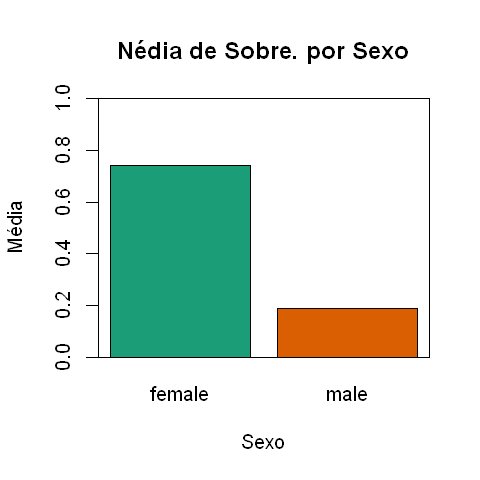

In [12]:
agg = aggregate(Survived ~ Sex, data = df, mean)
agg

barplot(agg$Survived,
        main = "Nédia de Sobre. por Sexo",
        xlab = "Sexo",
        ylab = "Média",
        ylim = c(0,1),
        names.arg = agg$Sex,
       col = brewer.pal(8, 'Dark2'))
box()

## SibSp

- Nenhum valor inválido encontrado

In [36]:
table(df['SibSp'], useNA='always')


   0    1    2    3    4    5    8 <NA> 
 608  209   28   16   18    5    7    0 

SibSp,Survived
0,0.3453947
1,0.5358852
2,0.4642857
3,0.2500000
4,0.1666667
5,0.0000000
8,0.0000000


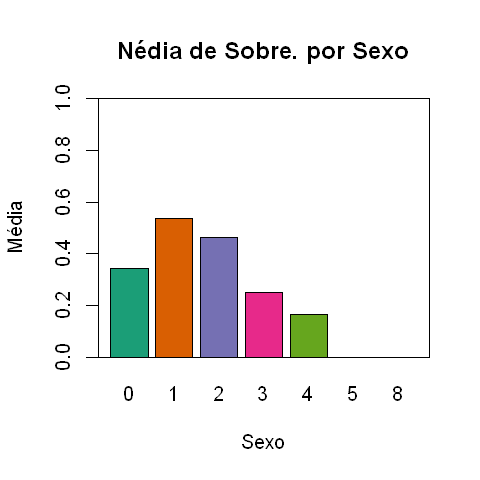

In [17]:
agg = aggregate(Survived ~ SibSp, data = df, mean)
agg

barplot(agg$Survived,
        main = "Nédia de Sobre. por Família",
        xlab = "Parentesco",
        ylab = "Média",
        ylim = c(0, 1),
        names.arg = agg$SibSp,
       col = brewer.pal(8, 'Dark2'))
box()

## Parch

- Nenhum valor inválido encontrado

In [37]:
table(df['Parch'], useNA='always')


   0    1    2    3    4    5    6 <NA> 
 678  118   80    5    4    5    1    0 

Parch,Survived
0,0.3436578
1,0.5508475
2,0.5000000
3,0.6000000
4,0.0000000
5,0.2000000
6,0.0000000


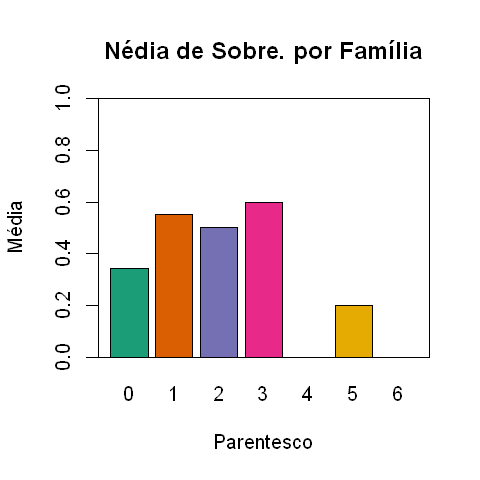

In [18]:
agg = aggregate(Survived ~ Parch, data = df, mean)
agg

barplot(agg$Survived,
        main = "Nédia de Sobre. por Família",
        xlab = "Parentesco",
        ylab = "Média",
        ylim = c(0, 1),
        names.arg = agg$Parch,
       col = brewer.pal(8, 'Dark2'))
box()

## Ticket

- Nenhum valor inválido encontrado

In [38]:
sum(is.na(df['Ticket']))

[1] 0

## Fare

- O valor máximo da tarifa assume 512, onde a média e o 75% percentil é 31-32
- Exitem passageiros que não pagaram tarifas

In [39]:
sum(is.na(df$Fare))

[1] 0

In [40]:
df[df['Fare'] >= 100, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
32,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NA,1,0,PC 17569,146.5208,B78,C
89,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
119,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
196,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
216,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
259,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NA,C
269,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
270,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
298,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [41]:
df[df['Fare'] <= 5, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
180,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0000,NA,S
264,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0000,B94,S
272,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0000,NA,S
278,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NA,0,0,239853,0.0000,NA,S
303,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0000,NA,S
379,379,0,3,"Betros, Mr. Tannous",male,20,0,0,2648,4.0125,NA,C
414,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NA,0,0,239853,0.0000,NA,S
467,467,0,2,"Campbell, Mr. William",male,NA,0,0,239853,0.0000,NA,S
482,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NA,0,0,239854,0.0000,NA,S
598,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0000,NA,S


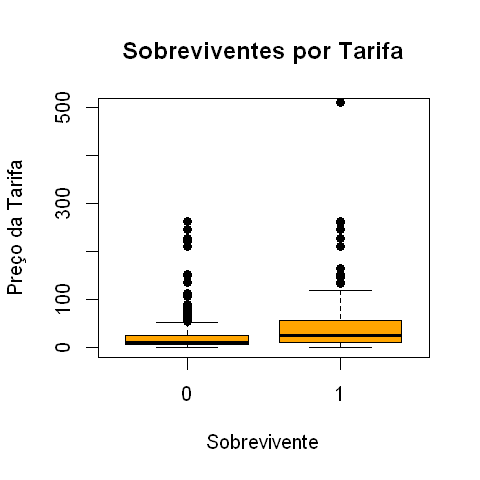

In [27]:
boxplot(
    df$Fare ~ df$Survived, 
    data = df,
    col = 'orange',
    outpch = 19,
    ylab = "Preço da Tarifa",
    xlab = "Sobrevivente",
    main = "Sobreviventes por Tarifa",
    boxwex = 0.8,
    ylim = c(0, 500)
)

## Cabin

- Contém valores nulos
- Passageiros com mais de uma cabine?

In [43]:
sum(is.na(df['Cabin']))

[1] 687

In [44]:
table(df$Cabin, useNA = 'always')


            A10             A14             A16             A19             A20 
              1               1               1               1               1 
            A23             A24             A26             A31             A32 
              1               1               1               1               1 
            A34             A36              A5              A6              A7 
              1               1               1               1               1 
           B101            B102             B18             B19             B20 
              1               1               2               1               2 
            B22             B28              B3             B30             B35 
              2               2               1               1               2 
            B37             B38             B39              B4             B41 
              1               1               1               1               1 
            B42            

## Embarked

- Contém valores nulos

In [45]:
sum(is.na(df['Embarked']))

[1] 2

In [46]:
table(df$Embarked, useNA='always')


   C    Q    S <NA> 
 168   77  644    2 

Embarked,Survived
C,0.5535714
Q,0.3896104
S,0.3369565


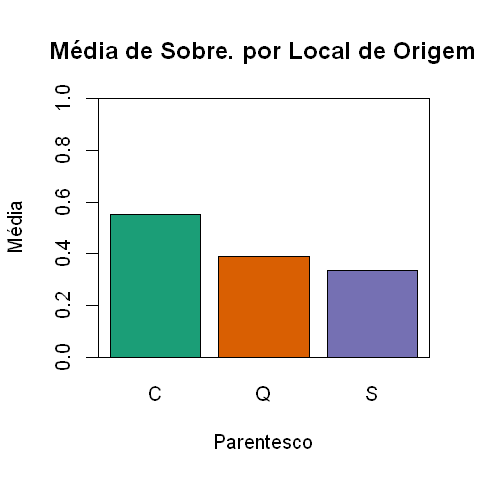

In [29]:
agg = aggregate(Survived ~ Embarked, data = df, mean)
agg

barplot(agg$Survived,
        main = "Média de Sobre. por Local de Origem",
        xlab = "Parentesco",
        ylab = "Média",
        ylim = c(0, 1),
        names.arg = agg$Embarked,
       col = brewer.pal(8, 'Dark2'))
box()

## Name

- Não parace ter valores inválidos

In [48]:
sum(is.na(df['Name']))

[1] 0